<a href="https://colab.research.google.com/github/krimplessy/Machine_Learning/blob/main/Logic_Method_%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec
from copy import deepcopy
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
from sklearn import tree
import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from torchvision import datasets
from torchvision import transforms
import time
import datetime

In [ ]:
# Файловый способ подключения выборки данных
#data = pd.read_csv('diabetes.csv', names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

file_path = "diabetes.csv"
data = pd.read_csv(file_path)

X = data.drop("Outcome", 1)
Y = data.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

# Алгоритм "Решающее дерево"

In [ ]:
train_accuracy=[]
test_accuracy=[]
models=[]
for depth in range(1,20):
  model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
  model.fit(X_train, Y_train)
  print(f'''
    max_depth: {depth}
    Results:
      Train={model.score(X_train, Y_train)}
      Test={model.score(X_test, Y_test)}
  ''')
  print(classification_report(Y_test, model.predict(X_test)))
  models.append(tree)
  train_accuracy.append(model.score(X_train, Y_train))
  test_accuracy.append(model.score(X_test, Y_test))


    max_depth: 1
    Results:
      Train=0.7337057728119181
      Test=0.7402597402597403
  
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       155
           1       0.61      0.61      0.61        76

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


    max_depth: 2
    Results:
      Train=0.7337057728119181
      Test=0.7402597402597403
  
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       155
           1       0.61      0.61      0.61        76

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


    max_depth: 3
    Results:
      Train=0.7690875232774674
      Test=0.7619047619047619
  
              precision    recall  f1-score   support

      

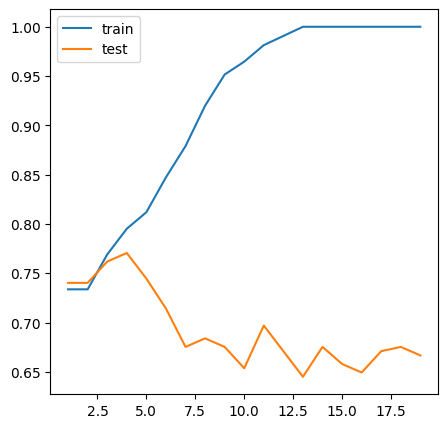

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(1,20), train_accuracy, label="train")
plt.plot(range(1,20), test_accuracy, label="test")
plt.legend(loc="best")

<h3> На графике можно заметить, что кривые расходятся на интервале [3,4], поэтому возьмем максимальную глубину, равную 3, при критерии "entropy".

In [ ]:
train_accuracy=[]
test_accuracy=[]
models=[]
for depth in range(1,20):
  model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
  model.fit(X_train, Y_train)
  print(f'''
    max_depth: {depth}
    Results:
      Train={model.score(X_train, Y_train)}
      Test={model.score(X_test, Y_test)}
  ''')
  print(classification_report(Y_test, model.predict(X_test)))
  models.append(tree)
  train_accuracy.append(model.score(X_train, Y_train))
  test_accuracy.append(model.score(X_test, Y_test))


    max_depth: 1
    Results:
      Train=0.7337057728119181
      Test=0.7402597402597403
  
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       155
           1       0.61      0.61      0.61        76

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


    max_depth: 2
    Results:
      Train=0.7355679702048417
      Test=0.7402597402597403
  
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       155
           1       0.79      0.29      0.42        76

    accuracy                           0.74       231
   macro avg       0.76      0.63      0.63       231
weighted avg       0.75      0.74      0.70       231


    max_depth: 3
    Results:
      Train=0.7783985102420856
      Test=0.7532467532467533
  
              precision    recall  f1-score   support

      

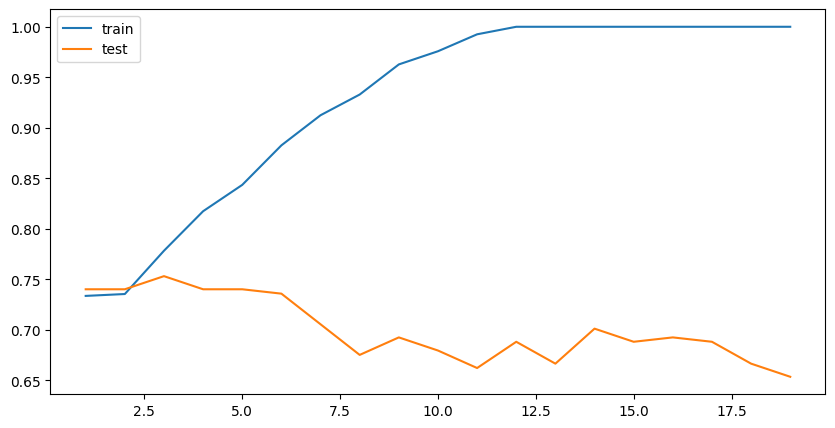

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(1,20), train_accuracy, label="train")
plt.plot(range(1,20), test_accuracy, label="test")
plt.legend(loc="best")

<h3> На графике можно заметить, что кривые расходятся на интервале [2,3], поэтому возьмем максимальную глубину, равную 3, при критерии "gini"

In [ ]:
train_accuracy=[]
test_accuracy=[]
models=[]
criterions=('entropy', 'gini')

for criterion in criterions:
  model = DecisionTreeClassifier(criterion=criterion, max_depth=3)
  model.fit(X_train, Y_train)
  print(f'''
    criterion: {criterion}
    Results:
      Train={model.score(X_train, Y_train)}
      Test={model.score(X_test, Y_test)}
  ''')
  print(classification_report(Y_test, model.predict(X_test)))
  models.append(model)
  train_accuracy.append(model.score(X_train, Y_train))
  test_accuracy.append(model.score(X_test, Y_test))


    criterion: entropy
    Results:
      Train=0.7690875232774674
      Test=0.7619047619047619
  
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       155
           1       0.65      0.59      0.62        76

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.76      0.76      0.76       231


    criterion: gini
    Results:
      Train=0.7783985102420856
      Test=0.7532467532467533
  
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       155
           1       0.64      0.58      0.61        76

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



<h3> При сравнении критериев для определения оптимальной максимальной глубины видно, что критерий "gini" дает немного лучшие результаты, чем критерий "entropy"

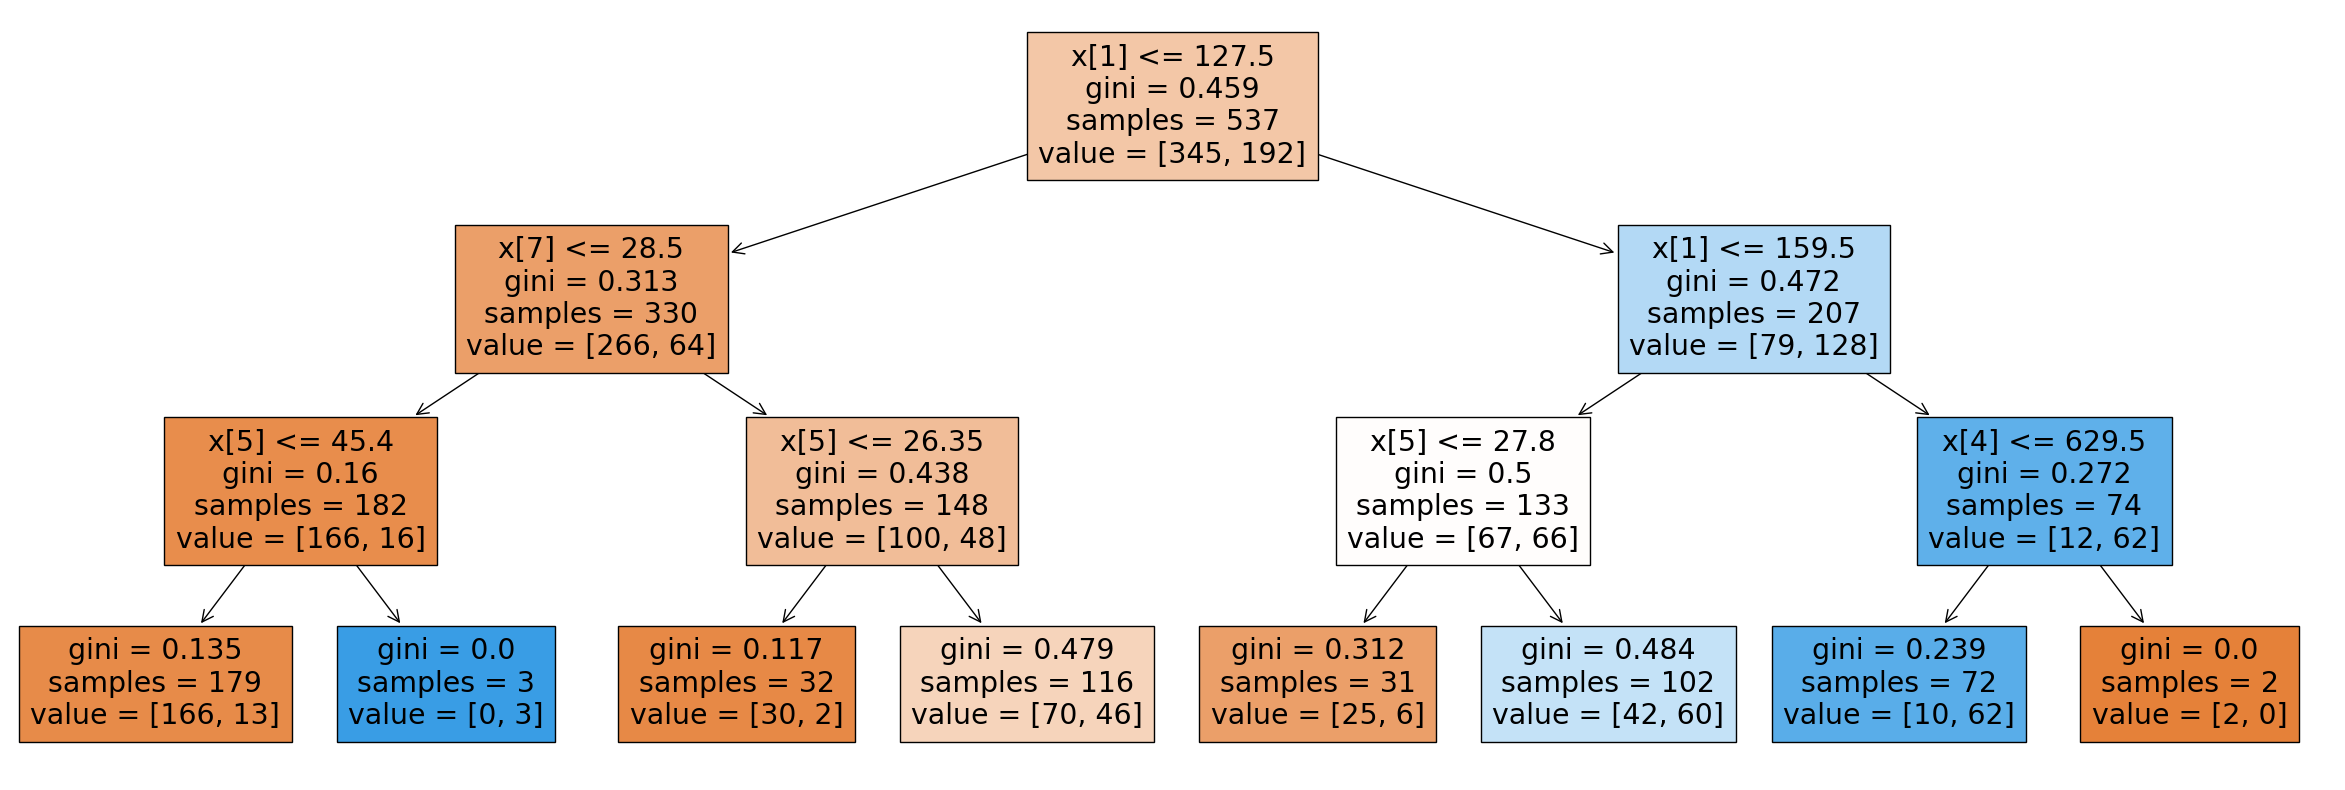

In [ ]:
# Графическое представление дерева

model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, Y_train)
ig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model, filled=True)

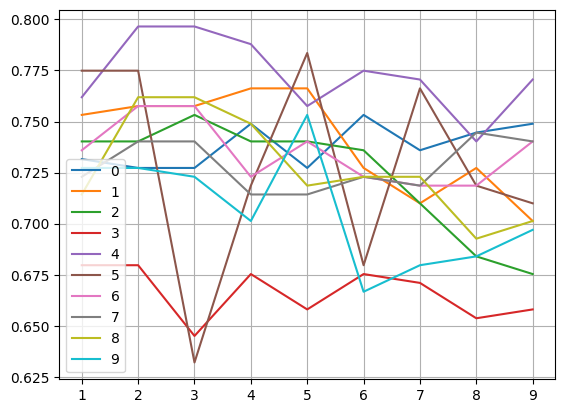

In [ ]:
for i in range(0,10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,    # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  test_accuracy = []

  for depth in range(1, 10):
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    model.fit(X_train, Y_train)
    test_accuracy.append(model.score(X_test, Y_test))

  plt.plot(range(1,10),test_accuracy, label=i)
  plt.legend(loc='best')

plt.grid()
plt.show()

На графике точности результатов при разных макисмальной глубине и random state для критерия "gini" видно, что при random_state = 2, оптимальная максимальная глубина равна 3

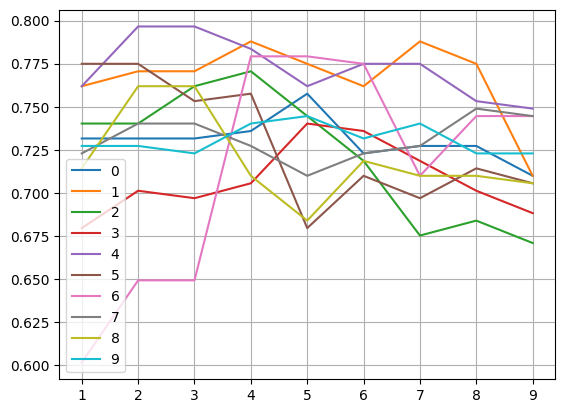

In [ ]:
for i in range(0,10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,    # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  test_accuracy = []

  for depth in range(1, 10):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    model.fit(X_train, Y_train)
    test_accuracy.append(model.score(X_test, Y_test))

  plt.plot(range(1,10),test_accuracy, label=i)
  plt.legend(loc='best')

plt.grid()
plt.show()

На графике точности результатов при разных макисмальной глубине и random state для критерия "entropy" видно, что при random_state = 2, оптимальная максимальная глубина равна 3

<h3>Алгоритм "Случайный лес"

In [ ]:
# Файловый способ подключения выборки данных
#data = pd.read_csv('diabetes.csv', names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

file_path = "diabetes.csv"
data = pd.read_csv(file_path)

X = data.drop("Outcome", 1)
Y = data.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [ ]:
# Алгоритм классификации
forest_list = []
train_accuracy_entropy = []
test_accuracy_entropy = []

for estimators in range(1,18):
  forest = RandomForestClassifier(criterion='entropy', n_estimators=estimators, max_features=3)
  forest.fit(X_train, Y_train)
  print(f'''
    estimators: {estimators}
    Results:
      Train={forest.score(X_train, Y_train)}
      Test={forest.score(X_test, Y_test)}
  ''')
  print(classification_report(Y_test, forest.predict(X_test)))
  forest_list.append(forest)
  train_accuracy_entropy.append(forest.score(X_train, Y_train))
  test_accuracy_entropy.append(forest.score(X_test, Y_test))


    estimators: 1
    Results:
      Train=0.8808193668528864
      Test=0.6883116883116883
  
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       150
           1       0.56      0.54      0.55        81

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.66       231
weighted avg       0.69      0.69      0.69       231


    estimators: 2
    Results:
      Train=0.8864059590316573
      Test=0.7012987012987013
  
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       150
           1       0.67      0.30      0.41        81

    accuracy                           0.70       231
   macro avg       0.69      0.61      0.61       231
weighted avg       0.69      0.70      0.66       231


    estimators: 3
    Results:
      Train=0.9441340782122905
      Test=0.7142857142857143
  
              precision    recall  f1-score   support

   

In [ ]:
forest_list = []
train_accuracy_gini = []
test_accuracy_gini = []

for estimators in range(1,18):
  forest = RandomForestClassifier(criterion='gini', n_estimators=estimators, max_features=3)
  forest.fit(X_train, Y_train)
  print(f'''
    estimators: {estimators}
    Results:
      Train={forest.score(X_train, Y_train)}
      Test={forest.score(X_test, Y_test)}
  ''')
  print(classification_report(Y_test, forest.predict(X_test)))
  forest_list.append(forest)
  train_accuracy_gini.append(forest.score(X_train, Y_train))
  test_accuracy_gini.append(forest.score(X_test, Y_test))


    estimators: 1
    Results:
      Train=0.9013035381750466
      Test=0.7272727272727273
  
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       150
           1       0.64      0.52      0.57        81

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231


    estimators: 2
    Results:
      Train=0.888268156424581
      Test=0.683982683982684
  
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       150
           1       0.63      0.23      0.34        81

    accuracy                           0.68       231
   macro avg       0.66      0.58      0.57       231
weighted avg       0.67      0.68      0.63       231


    estimators: 3
    Results:
      Train=0.9497206703910615
      Test=0.7272727272727273
  
              precision    recall  f1-score   support

     

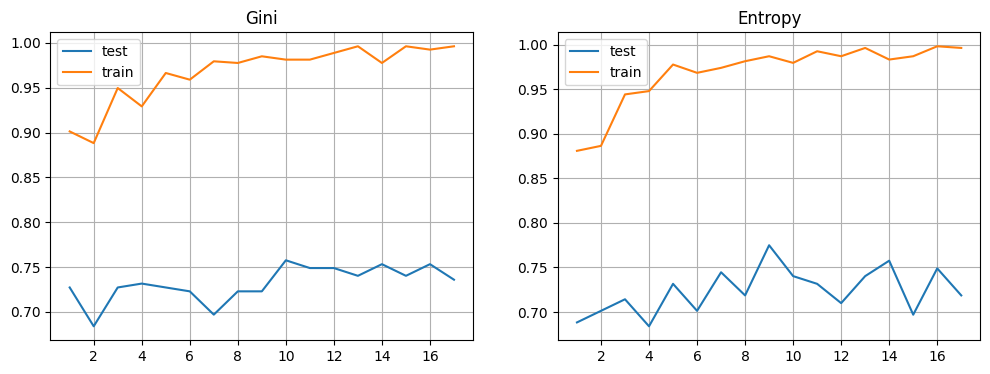

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ax1.plot(range(1,18),test_accuracy_gini, label="test")
ax1.plot(range(1,18),train_accuracy_gini, label="train")
ax2.plot(range(1,18),test_accuracy_entropy, label="test")
ax2.plot(range(1,18),train_accuracy_entropy, label="train")
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_title('Gini')
ax2.set_title('Entropy')

ax1.grid()
ax2.grid()
plt.show()


На графиках зависимости результата от количества деревьев видно, что оптимальное количество деревьев - 9

In [ ]:
forest_list = []
train_accuracy_gini = []
test_accuracy_gini = []

for features in range(1,10):
  forest = RandomForestClassifier(criterion='gini', n_estimators=9, max_features=features)
  forest.fit(X_train, Y_train)
  print(f'''
    features: {features}
    Results:
      Train={forest.score(X_train, Y_train)}
      Test={forest.score(X_test, Y_test)}
  ''')
  print(classification_report(Y_test, forest.predict(X_test)))
  forest_list.append(forest)
  train_accuracy_gini.append(forest.score(X_train, Y_train))
  test_accuracy_gini.append(forest.score(X_test, Y_test))


    features: 1
    Results:
      Train=0.9888268156424581
      Test=0.6926406926406926
  
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       150
           1       0.58      0.44      0.50        81

    accuracy                           0.69       231
   macro avg       0.66      0.64      0.64       231
weighted avg       0.68      0.69      0.68       231


    features: 2
    Results:
      Train=0.9888268156424581
      Test=0.7056277056277056
  
              precision    recall  f1-score   support

           0       0.75      0.83      0.78       150
           1       0.60      0.48      0.53        81

    accuracy                           0.71       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.70      0.71      0.70       231


    features: 3
    Results:
      Train=0.9795158286778398
      Test=0.7142857142857143
  
              precision    recall  f1-score   support

         

In [ ]:
forest_list = []
train_accuracy_entropy = []
test_accuracy_entropy = []

for features in range(1,10):
  forest = RandomForestClassifier(criterion='entropy', n_estimators=9, max_features=features)
  forest.fit(X_train, Y_train)
  print(f'''
    features: {features}
    Results:
      Train={forest.score(X_train, Y_train)}
      Test={forest.score(X_test, Y_test)}
  ''')
  print(classification_report(Y_test, forest.predict(X_test)))
  forest_list.append(forest)
  train_accuracy_entropy.append(forest.score(X_train, Y_train))
  test_accuracy_entropy.append(forest.score(X_test, Y_test))


    features: 1
    Results:
      Train=0.9888268156424581
      Test=0.7272727272727273
  
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.65      0.48      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231


    features: 2
    Results:
      Train=0.9888268156424581
      Test=0.7056277056277056
  
              precision    recall  f1-score   support

           0       0.74      0.83      0.79       150
           1       0.60      0.47      0.53        81

    accuracy                           0.71       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.69      0.71      0.70       231


    features: 3
    Results:
      Train=0.9869646182495344
      Test=0.7012987012987013
  
              precision    recall  f1-score   support

         

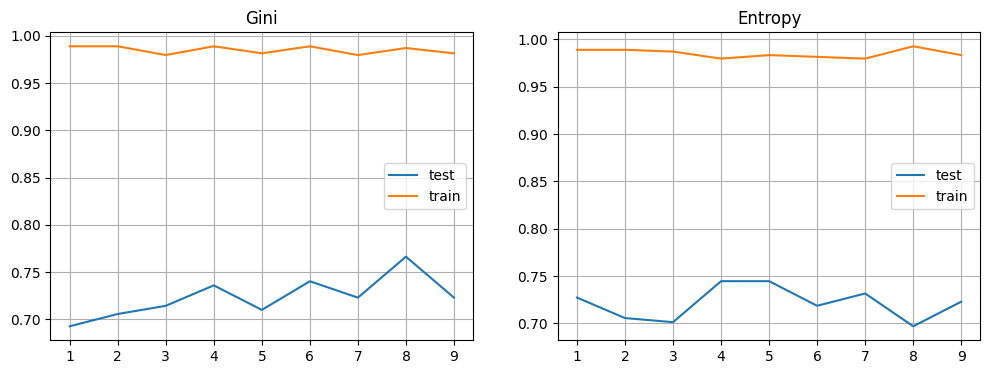

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ax1.plot(range(1,10),test_accuracy_gini, label="test")
ax1.plot(range(1,10),train_accuracy_gini, label="train")
ax2.plot(range(1,10),test_accuracy_entropy, label="test")
ax2.plot(range(1,10),train_accuracy_entropy, label="train")
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_title('Gini')
ax2.set_title('Entropy')

ax1.grid()
ax2.grid()
plt.show()

На графиках зависимости результата от кол-ва признаков видно, что при критерии "gini" оптимальное кол-во признаков - 8, а при критерии "entropy" - 5.

Критерий "gini" показывает более высокую точность.

<h3>random state

# Наилучший результат при применении алгоритма "Случайный лес"

In [ ]:
for features in range(8,9):
  forest = RandomForestClassifier(criterion='gini', n_estimators=9, max_features=8)
  forest.fit(X_train, Y_train)
  print(f'''
    Results:
      Train={forest.score(X_train, Y_train)}
      Test={forest.score(X_test, Y_test)}
  ''')
  print(classification_report(Y_test, forest.predict(X_test)))


    Results:
      Train=0.9888268156424581
      Test=0.7489177489177489
  
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.60      0.63        81

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



<h3> random state для кол-ва деревьев и кол-ва признаков

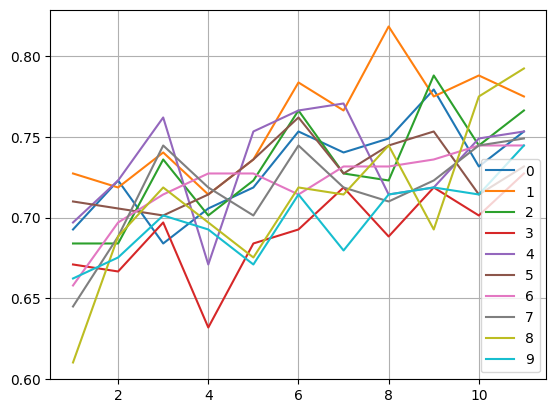

In [ ]:
max_n_estimators = 12

for i in range(0,10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,   # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  test_accuracy = []

  for estimators in range(1, max_n_estimators):
    model = RandomForestClassifier(criterion='gini', n_estimators=estimators)
    model.fit(X_train, Y_train)
    test_accuracy.append(model.score(X_test, Y_test))

  plt.plot(range(1,max_n_estimators),test_accuracy, label=i)
  plt.legend(loc='best')

plt.grid()
plt.show()

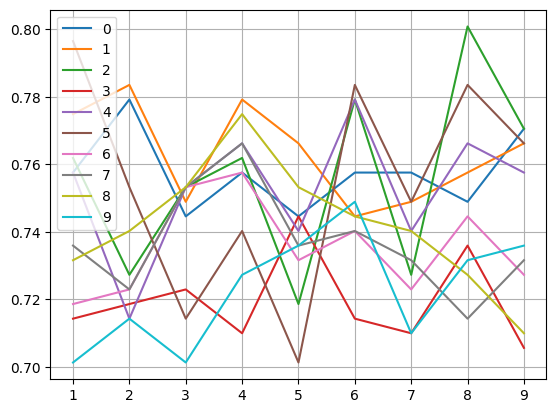

In [ ]:
max_n_features = 10

for i in range(0,10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,   # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  test_accuracy = []

  for estimators in range(1, max_n_features):
    model = RandomForestClassifier(criterion='gini', n_estimators=9)
    model.fit(X_train, Y_train)
    test_accuracy.append(model.score(X_test, Y_test))

  plt.plot(range(1,max_n_features),test_accuracy, label=i)
  plt.legend(loc='best')

plt.grid()
plt.show()

#  Выводы

<h3> Алгоритм "Решающее дерево" </h3>

При работе с данным алгоритмом первым делом необходимо было выбрать максимальную глубину. Для этого были рассмотрены глубины от 1 до 20 при критериях "gini" и "entropy", а также построены графики точности. Благодаря графикам стало заметно, что при разных критериях максимальная глубина находилась в интервалах [2,3] и [3,4], поэтому выбрана максимальная глубина, равная 3.

Для того, чтобы убедиться, что для random_state = 2, была выбрана верная максимальная глубина, были построены графики при различных random_state.

На моих исходных данных наиболее подходящим оказался критерий "gini". Точность на тренировочной выборке равна 77-78%, а на контрольной - 75-76%.

<h3> Алгоритм "Случайный лес" </h3>

При работе с данным алгоритмом необходимо было определить оптимальное количество деревьев и оптимальное количество признаков. Для этого были рассмотрены количества деревьев и признаков также от 1 до 20 при критериях "gini" и "entropy", а также построены графики точности. Было выявлено, что наилучший результат получится при количестве деревьев - 9 и количестве признаков - 8. Лучшим критерием оказался критерий "gini".

Для того, чтобы убедиться, что для random_state = 2, были выбраны верные данные, были построены графики при различных random_state.

Точность на тренировочной выборке равна 98-99%, а на контрольной - 74-75%. Алгоритм "Решающее дерево" оказался более эффективным для моей выборки.

